In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

__Import necessary libraries__

In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
import matplotlib.pyplot as plt

__Read the csv file__

In [12]:
raw_data = pd.read_csv('datasets_13720_18513_insurance.csv')
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


__Check for any null values in the columns__

In [14]:
print('Number of null values in each column')
raw_data.isnull().sum()

Number of null values in each column


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

__Check for any datatypes in the columns__

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Pre-processing
* Initially object columns have to be encoded, hence they are seperated
* After completing the encoding, they are joined

In [32]:
df_object = raw_data.select_dtypes(include='object')
df_exclude_object = raw_data.select_dtypes(exclude='object')


In [33]:
for i in range(len(df_object.columns)):    
    encoder = LabelEncoder()
    encoder.fit(df_object.iloc[:,i].unique())
    df_object.iloc[:,i] = encoder.transform(df_object.iloc[:,i])
# encoder = LabelEncoder()
# # encoder.(df_object.iloc[:,0].unique())
# # encoder
# encoder.fit(df_object.iloc[:,2].unique())
# encoder.transform(df_object.iloc[:,2])
# # encoder
df_object

C:\Users\Arjun Janamatti\Anaconda3\envs\abcd\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Arjun Janamatti\Anaconda3\envs\abcd\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [36]:
df = df_object.join(df_exclude_object)
df

,sex,smoker,region,age,bmi,children,charges
0,0,1,3,19,27.900,0,16884.92400
1,1,0,2,18,33.770,1,1725.55230
2,1,0,2,28,33.000,3,4449.46200
3,1,0,1,33,22.705,0,21984.47061
4,1,0,1,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...
1333,1,0,1,50,30.970,3,10600.54830
1334,0,0,0,18,31.920,0,2205.98080
1335,0,0,2,18,36.850,0,1629.83350
1336,0,0,3,21,25.800,0,2007.94500


### Splitting data

In [16]:
def split_for_validation(a,n):
    '''
    a = dataframe,
    n = percentage of split
    '''
    return a[: len(a) - (int(len(a) * n))].copy(), a[len(a) - (int(len(a) * n)):].copy()    

In [124]:
feature_columns = df.iloc[:,:-1].values
dependent_column = df.iloc[:,-1].values
X_train, X_valid = split_for_validation(a = feature_columns,
                                        n = 0.1)
y_train, y_valid = split_for_validation(a = dependent_column,
                                        n = 0.1)
print('Training data: ', X_train.shape, y_train.shape)
print('Validation data: ', X_valid.shape, y_valid.shape)

Training data:  (1205, 6) (1205,)
Validation data:  (133, 6) (133,)


In [125]:

# X_train, X_valid = split_for_validation(a = feature_columns,
#                                         n = 0.1)
# y_train, y_valid = split_for_validation(a = dependent_column,
#                                         n = 0.1)
# print('Training data: ', X_train.shape, y_train.shape)
# print('Validation data: ', X_valid.shape, y_valid.shape)
# m = RandomForestRegressor(n_jobs=-1)
# m.fit(X_train, y_train)
# predTree = m.predict(X_valid)
# print('Training accuracy: ', m.score(X_train, y_train))
# print()
# print('Validation accuracy: ', m.score(X_valid, y_valid))

### Random Forest Regressor

In [126]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [127]:
predTree = m.predict(X_valid)

In [128]:
print('Training accuracy: ', round((m.score(X_train, y_train))*100,2),'%')
print()
print('Validation accuracy: ', round((m.score(X_valid, y_valid))*100,2),'%')

Training accuracy:  97.7 %

Validation accuracy:  86.74 %


### Scatter plot to compare results of actual and predicted value for validation dataset

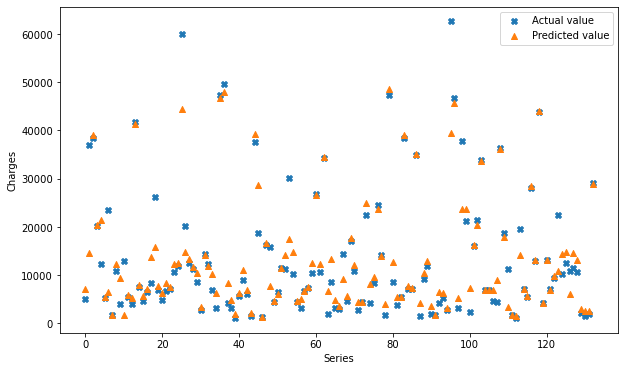

In [129]:
plt.figure(figsize=(10,6))
plt.scatter(x = list(range(len(y_valid))), y = y_valid, marker = 'X')
plt.scatter(x = list(range(len(predTree))), y = predTree, marker = '^')
plt.xlabel('Series')
plt.ylabel('Charges')
plt.legend(['Actual value', 'Predicted value'])
plt.show()

### Plot absolute difference of actual and predicted value for validation dataset

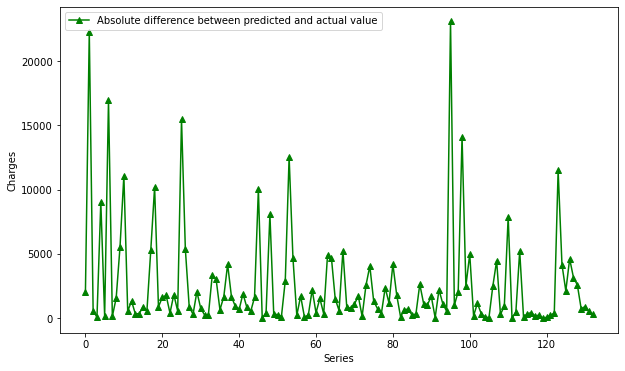

In [130]:
plt.figure(figsize=(10,6))
plt.plot(abs(predTree - y_valid), marker = '^', c = 'g')
plt.xlabel('Series')
plt.ylabel('Charges')
plt.legend(['Absolute difference between predicted and actual value'])
plt.show()

### Frequency of difference in values

(array([17., 19.,  9.,  9.,  7.,  7.,  5.,  2.,  3.,  7.,  4.,  3.,  3.,
         1.,  4.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  4.,  0.,  1.,
         3.,  0.,  2.,  2.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.]),
 array([    0.        ,   174.96212121,   349.92424242,   524.88636364,
          699.84848485,   874.81060606,  1049.77272727,  1224.73484848,
         1399.6969697 ,  1574.65909091,  1749.62121212,  1924.58333333,
         2099.54545455,  2274.5075

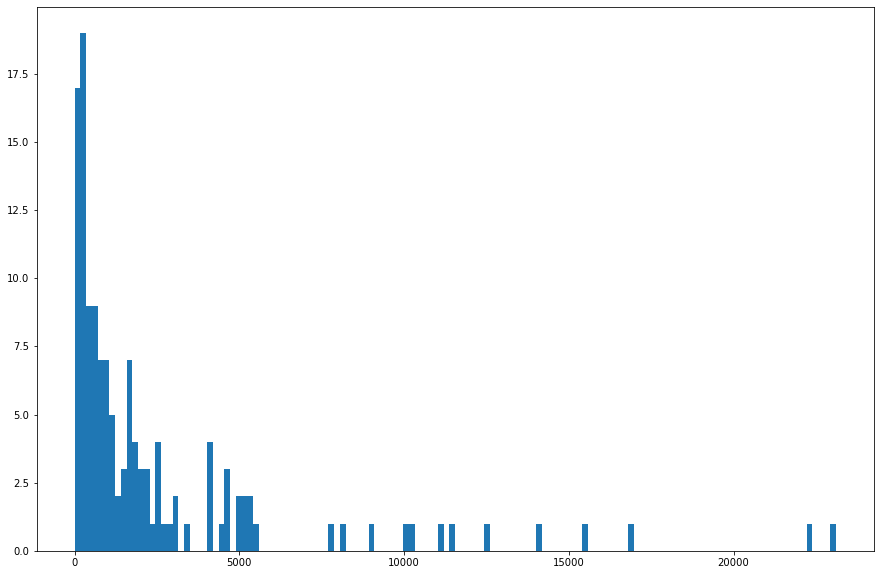

In [131]:
a = (abs(predTree - y_valid))
a = np.array(a, dtype='int')
# np.unique(a, return_counts=True)
plt.figure(figsize=(15,10))
plt.hist(a, bins = len((np.unique(a, return_counts=True))[0]))
# plt.hist(a, bins = 5)

In [134]:
more_than_one_hundred = []
for i in range(len(a)):
    if a[i] > 500:
        more_than_one_hundred.append(i)
print("Out of {} values with difference more than 500 is: ".format(len(y_valid)), len(more_than_one_hundred))

Out of 133 values with difference more than 500 is:  91
